In [516]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [517]:
#loading the dataset
data=pd.read_csv(r"C:\Users\SSN\OneDrive - SSN Trust\Desktop\ABC\customer_support_tickets.csv")
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [518]:
#checking the dimantions of the data
data.shape

(8469, 17)

In [519]:
# looking for thr null values
data.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [520]:
#exploring the datatype and describing it
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


# CLEANING THE DATA SET

In [521]:
# dropping the nan values
data = data.dropna()

In [522]:
#checking the new shape of the data
data.shape

(2769, 17)

In [523]:
#encoding the categorical variable for building predictive model purposes
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
data.loc[:,"column"] = label_encoders[column].fit_transform(data[column])

# EDA WITH DATA VISUALISATIONS

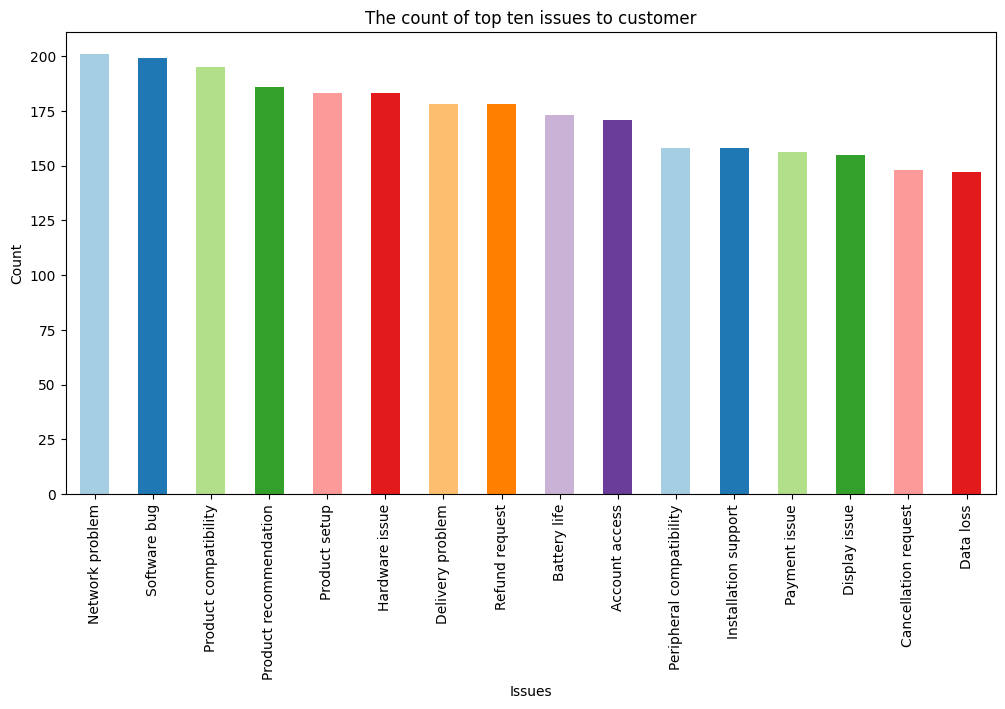

In [524]:
#Analyze customer support ticket trends
Top_ten_issues=data["Ticket Subject"].value_counts()
colors=plt.cm.Paired(range(10))

#plotting the bar chart
plt.figure(figsize=(12,6))
Top_ten_issues.plot(kind="bar",color=colors)

#labelling title and axis
plt.xlabel("Issues")
plt.ylabel("Count")
plt.title("The count of top ten issues to customer")

#shows the barplot
plt.show()

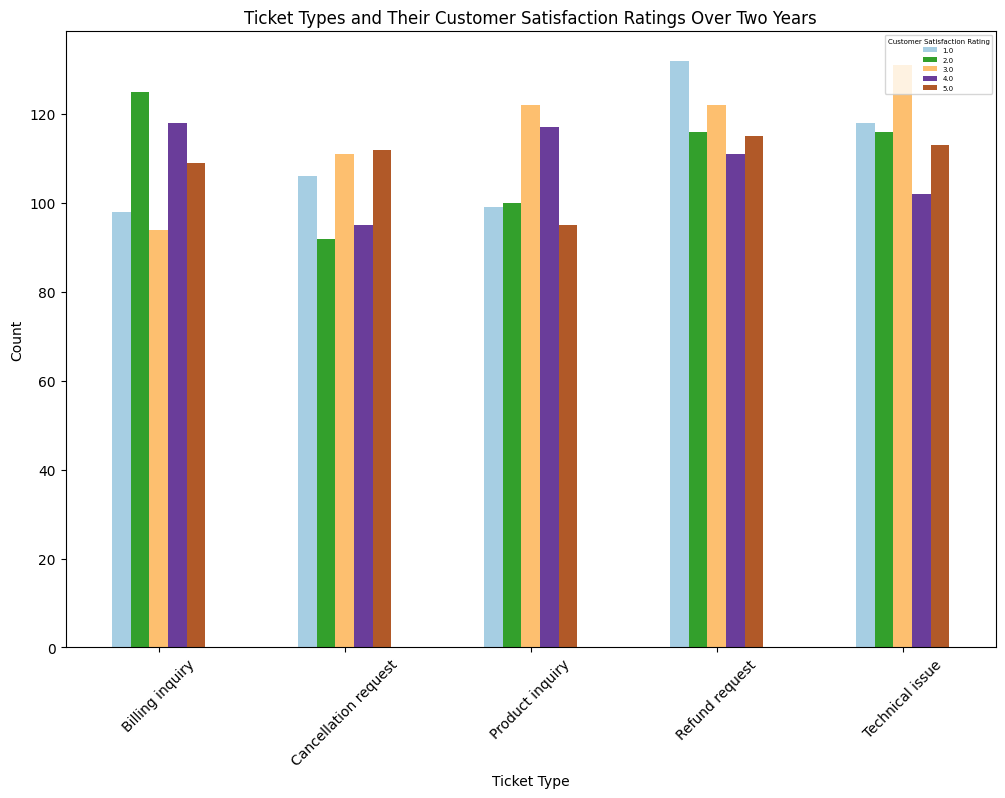

In [525]:
#Analyze most tupes of tickets raised

# Count of tickets grouped by 'Ticket Type' and 'Customer Satisfaction Rating'
ticket_counts = data.groupby(["Ticket Type", "Customer Satisfaction Rating"]).size().unstack()

# Plot grouped bar chart
ticket_counts.plot(kind="bar", figsize=(12, 8), colormap="Paired")

# Labels and title
plt.xlabel("Ticket Type")
plt.ylabel("Count")
plt.title("Ticket Types and Their Customer Satisfaction Ratings Over Two Years")
plt.xticks(rotation=45)  # Rotate for readability
plt.legend(title="Customer Satisfaction Rating",loc="upper right",fontsize=5, title_fontsize=5)

# Show plot
plt.show()


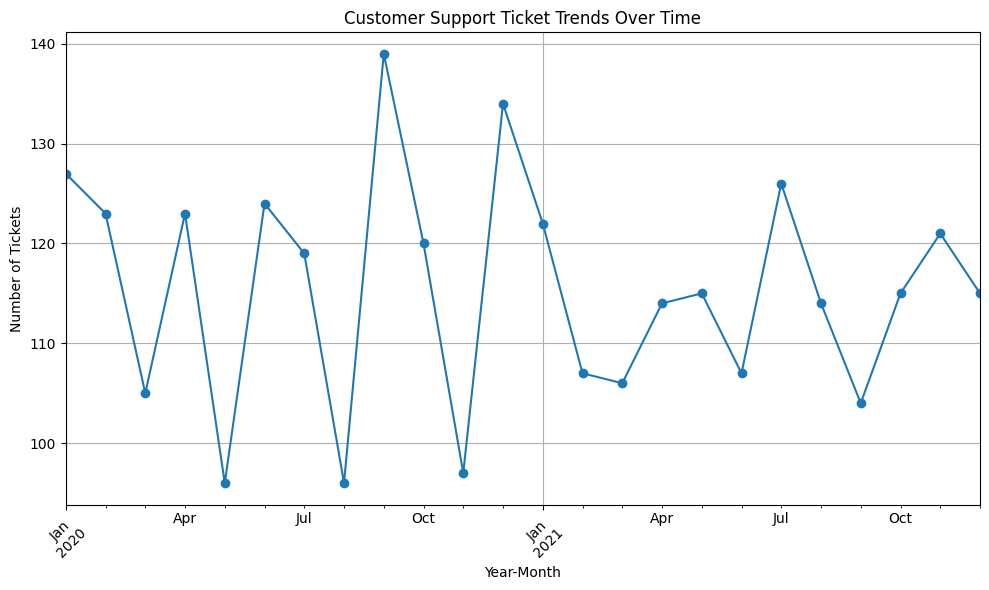

In [526]:
# Plotting ticket trends over time

#converting the daate of purchase to the date time format
data["Date of Purchase"] = pd.to_datetime(data['Date of Purchase'])
data["YearMonth"] = data["Date of Purchase"].dt.to_period("M")

#counting the size of the ticket trends
ticket_trends = data.groupby('YearMonth').size()

#plotting the graph
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')

#labelling the axes and the title
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

#show plot
plt.show()

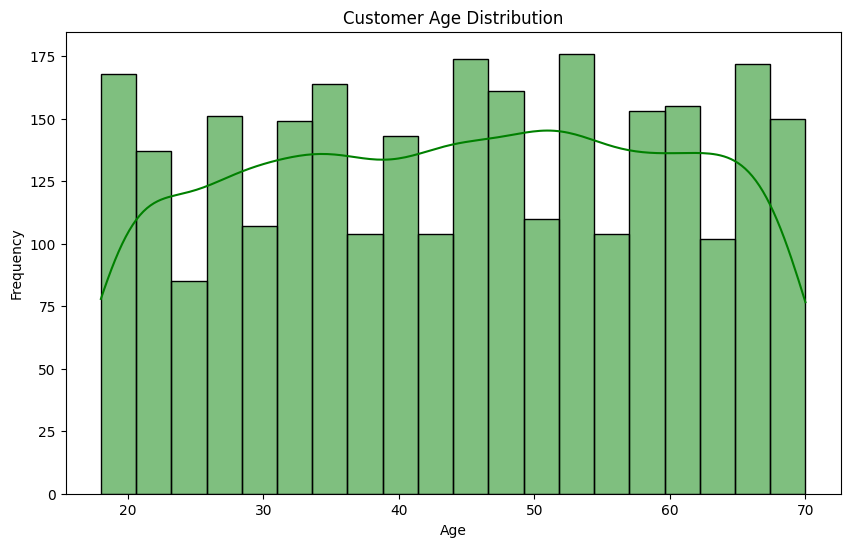

In [527]:
#Customer Age Distribution

#plotting the bar graph
plt.figure(figsize=(10, 6))

sns.histplot(data['Customer Age'], bins=20, kde=True,
color='green')

#aading the axes and title
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

#show plot
plt.show()

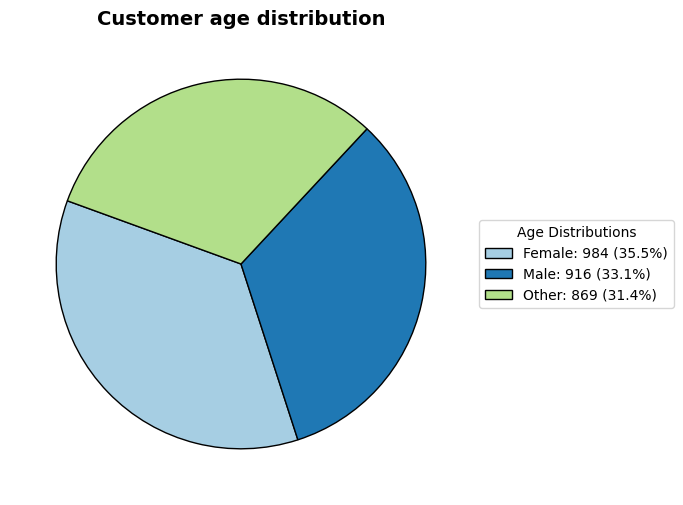

In [528]:
#Customer gender distribution

# Count occurrences of each gender type
gender_counts = data["Customer Gender"].value_counts()

# Define colors
colors=plt.cm.Paired(range(3))

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot pie chart (Fix: Unpack only two values)
wedges, _ = ax.pie(
    gender_counts, 
    labels=None,  # No labels inside
    startangle=160,  
    colors=colors,  
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Add borders
)

# Create legend with values
legend_labels = [f"{label}: {count} ({count/sum(gender_counts)*100:.1f}%)" 
                 for label, count in zip(gender_counts.index, gender_counts)]
ax.legend(wedges, legend_labels, title="Age Distributions", loc="center left", bbox_to_anchor=(1, 0.5))

# Set title
plt.title("Customer age distribution", fontsize=14, fontweight='bold')

# Show plot
plt.show()

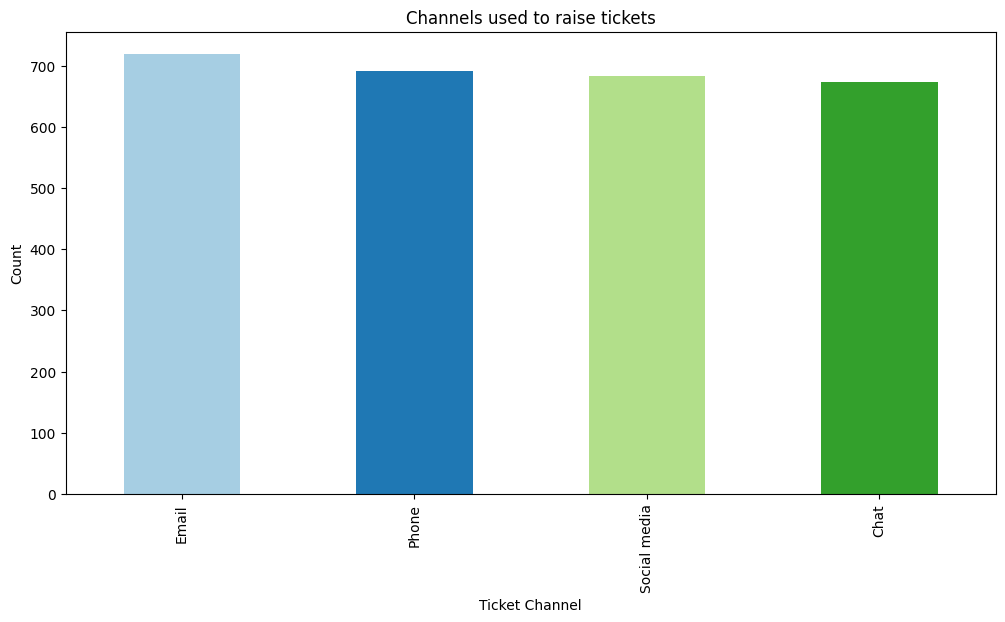

In [529]:
#ticket channel distributions and their share
Tickect_channel_count=data["Ticket Channel"].value_counts()
colors=plt.cm.Paired(range(4))

#plotting the bar chart
plt.figure(figsize=(12,6))
Tickect_channel_count.plot(kind="bar",color=colors)

#labelling title and axis
plt.xlabel("Ticket Channel")
plt.ylabel("Count")
plt.title("Channels used to raise tickets")

#shows the barplot
plt.show()

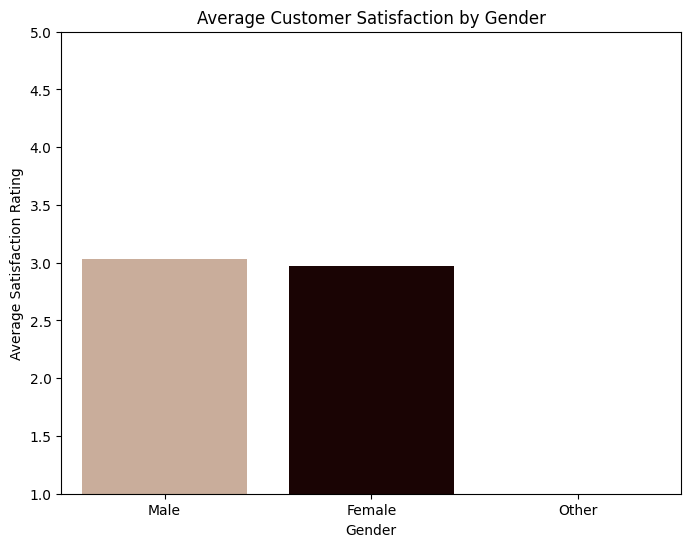

In [530]:
# Chart 1: Average Customer Satisfaction by Gender (Bar Plot)

# grouping the data
average_satisfaction = data.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=average_satisfaction, hue=average_satisfaction.index , palette='pink',order=['Male', 'Female', 'Other'], legend=False)

#labelling the axis and title
plt.title('Average Customer Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(1, 5) # Adjust y-axis limit if needed

# show plot
plt.show()

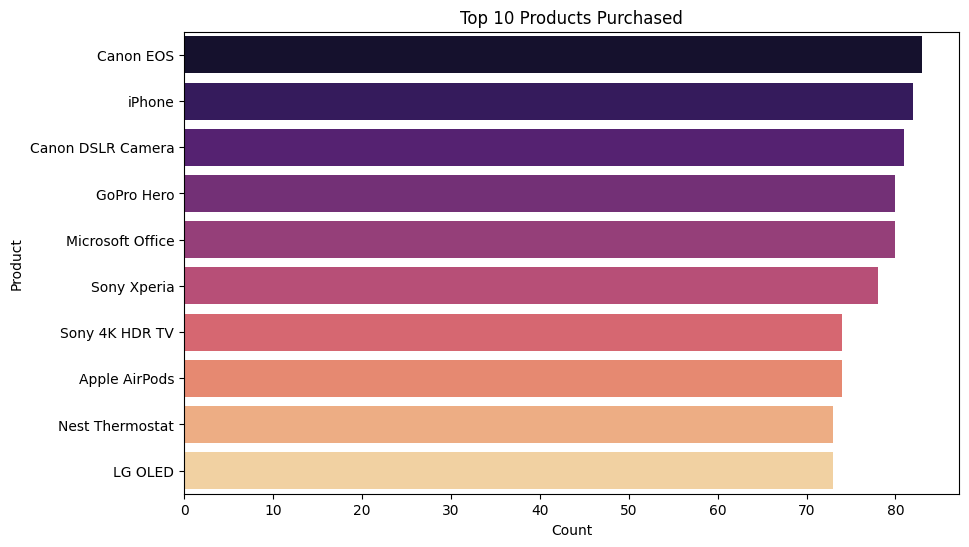

In [531]:
#Product Purchased Distribution
#counting the frequency of top ten product purchased
product_purchased_distribution = data['Product Purchased'].value_counts().head(10)

#plotting the graph
plt.figure(figsize=(10, 6))
sns.barplot(y=product_purchased_distribution.index,x=product_purchased_distribution,  hue=product_purchased_distribution.index,palette='magma',legend=False)

#labelling the axis and title
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product')

#show plot
plt.show()

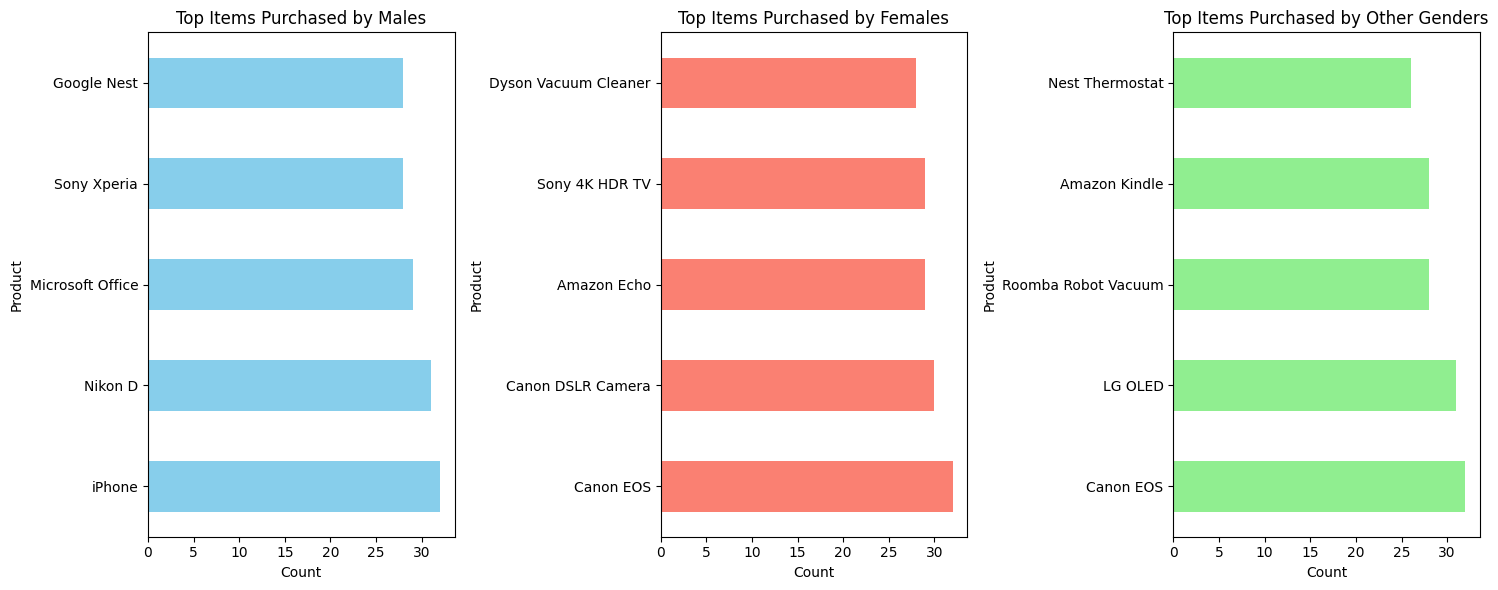

In [532]:
#Top Items Purchased by Gender (Horizontal Bar Chart)

#Plotting the bar graph
plt.figure(figsize=(15, 6))

# Top Items Purchased by Males
plt.subplot(1, 3, 1)
top_items_male = data[data['Customer Gender'] =='Male']['Product Purchased'].value_counts().head(5)
top_items_male.plot(kind='barh', color='skyblue')
plt.title('Top Items Purchased by Males')
plt.xlabel('Count')
plt.ylabel('Product')

# Top Items Purchased by Females
plt.subplot(1, 3, 2)
top_items_female = data[data['Customer Gender'] =='Female']['Product Purchased'].value_counts().head(5)
top_items_female.plot(kind='barh', color='salmon')
plt.title('Top Items Purchased by Females')
plt.xlabel('Count')
plt.ylabel('Product')

# Top Items Purchased by Other Gender
plt.subplot(1, 3, 3)
top_items_other = data[data['Customer Gender'] =='Other']['Product Purchased'].value_counts().head(5)
top_items_other.plot(kind='barh', color='lightgreen')

#labelling the axis nd title
plt.title('Top Items Purchased by Other Genders')
plt.xlabel('Count')
plt.ylabel('Product')
plt.tight_layout()

#show plot
plt.show()

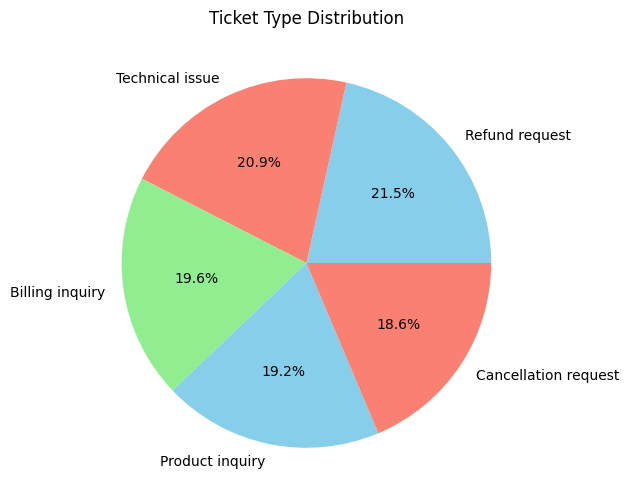

In [533]:
# Count ticket types

#counting the frequency of the ticket type
ticket_type_distribution = data['Ticket Type'].value_counts()

# Ploting the bar graph
plt.figure(figsize=(8, 6))
ticket_type_distribution.plot(kind='pie', autopct='%1.1f%%',colors=['skyblue', 'salmon', 'lightgreen'])

#labelling the title
plt.title('Ticket Type Distribution')
plt.ylabel('')

#show plot
plt.show()

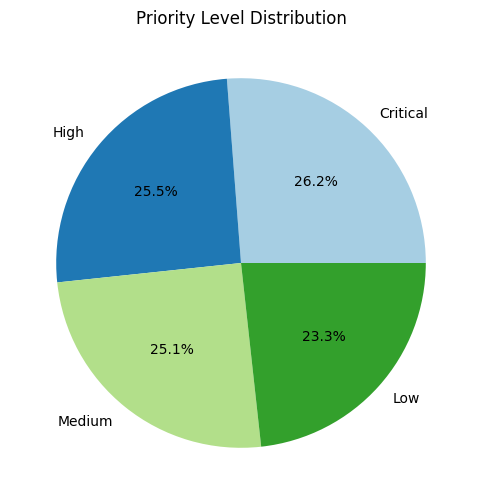

In [534]:
# Count ticket priorities visualization

#counting the values of different ticket priority
priority_distribution = data['Ticket Priority'].value_counts()
colors=plt.cm.Paired(range(4))

#plotting the chart
plt.figure(figsize=(8, 6))
priority_distribution.plot(kind='pie', autopct='%1.1f%%',colors=colors)

#labelling the axis and title
plt.title('Priority Level Distribution')
plt.ylabel('')

#show plot
plt.show()

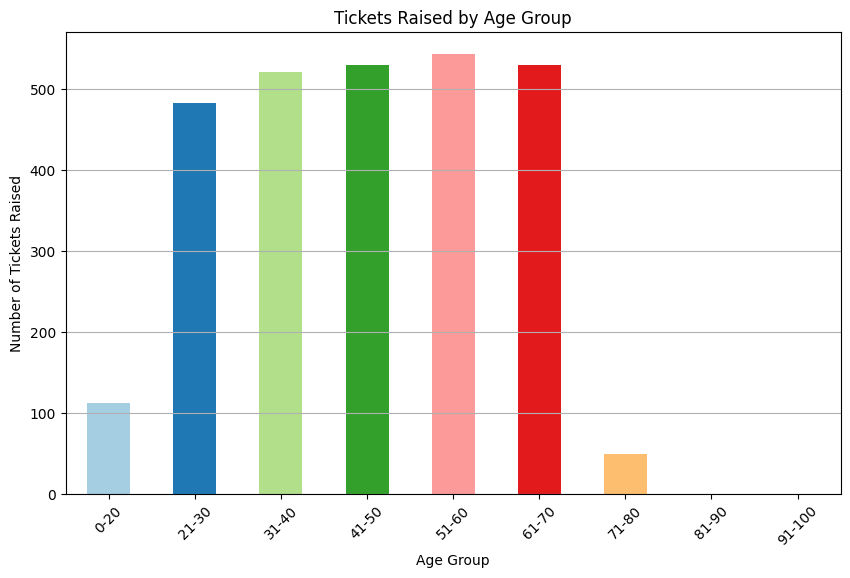

In [535]:
#visualizing the ticket raised by different age groups

# Define age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70',
'71-80', '81-90', '91-100']

# Categorize customers into age groups
data['Age Group'] = pd.cut(data['Customer Age'], bins=bins,labels=labels, right=False)

# Calculate number of tickets raised by each age group
tickets_by_age_group = data.groupby('Age Group',observed=False).size()
colors=plt.cm.Paired(range(9))

#plotting the graph
plt.figure(figsize=(10, 6))
tickets_by_age_group.plot(kind='bar', color=colors)

#labelling the axis and title
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')

#show plot
plt.show()

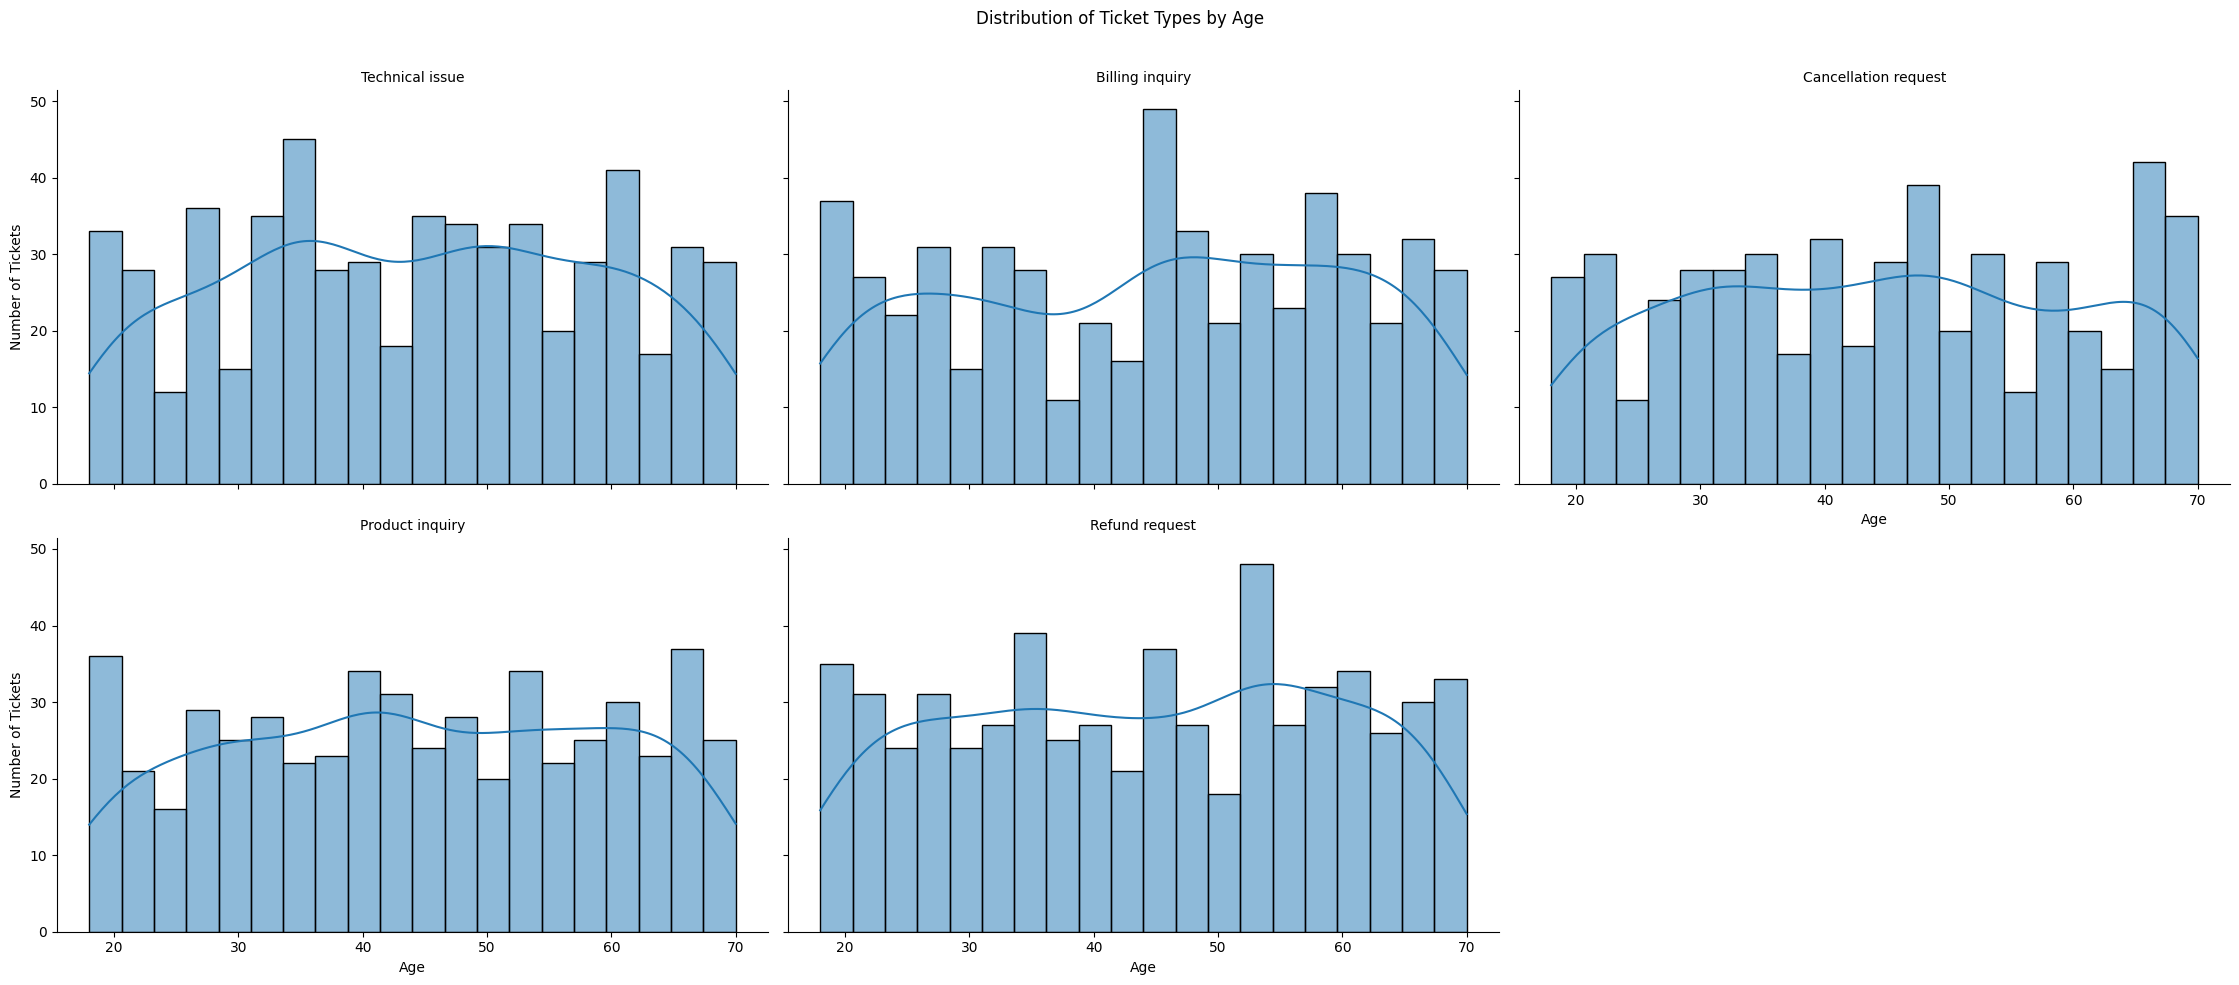

In [536]:
# Create a facet grid for each ticket type

#plotting the graph
g = sns.FacetGrid(data, col='Ticket Type', col_wrap=3,
height=5, aspect=1.5)
g.map(sns.histplot, 'Customer Age', bins=20, kde=True)

# Set titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('Age', 'Number of Tickets')

# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ticket Types by Age')

# Show plot
plt.show()

# FEATURE ENGINEERING

In [537]:
# Ensure correct datetime parsing with dayfirst=False for ISO format
data['First Response Time'] = pd.to_datetime(data['First Response Time'], dayfirst=False)
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], dayfirst=False)

# Calculating resolution time in hours
data['Resolution Time'] = (data['Time to Resolution'] - data['First Response Time']).dt.total_seconds() / 3600

# Handle NaN and infinite values before conversion
data['Resolution Time'] = data['Resolution Time'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Convert to integer
data['Resolution Time'] = data['Resolution Time'].astype(int)

# Display output
print(data[['First Response Time', 'Time to Resolution', 'Resolution Time']].head())


   First Response Time  Time to Resolution  Resolution Time
2  2023-06-01 11:14:38 2023-06-01 18:05:38                6
3  2023-06-01 07:29:40 2023-06-01 01:57:40               -5
4  2023-06-01 00:12:42 2023-06-01 19:53:42               19
10 2023-06-01 17:46:49 2023-05-31 23:51:49              -17
11 2023-06-01 12:05:51 2023-06-01 09:27:51               -2


In [538]:
#Ticket Resolution Time: Creating a feature for the time taken to resolve tickets.
data['Resolution Time'] = (pd.to_datetime(data['Time to Resolution']) - pd.to_datetime(data['First Response Time'])).dt.total_seconds() / 3600
data['Resolution Time'] = data['Resolution Time'].round().astype(int)


# Convert 'First Response Time' to numeric
data['First Response Time'] = pd.to_numeric(data['First Response Time'], errors='coerce')

# Calculate the average first response time
avg_response_time = data['First Response Time'].mean()

# Create a new column for fast response based on the average
data['Fast Response'] = (data['First Response Time'] <= avg_response_time).astype(int)

#Age Group Transformation for numerical feature
# Define the age bins based on your range (18-70)
bins = [18, 30, 40, 50, 60, 70]
labels = ['Youth', 'Young Adult', 'Middle-Aged', 'Older Adult', 'Senior']  # Labels for each bin

# Create a new 'Age Group' column based on the bins
data['Age Group'] = pd.cut(data['Customer Age'], bins=bins, labels=labels, right=False)

# Select only 'First Response Time' and 'Resolution Time' as features
x = data[['First Response Time', 'Resolution Time']]  # Features
y = data['Customer Satisfaction Rating']  # Target variable


In [539]:
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=42)

In [540]:
# Selecting only numerical columns for scaling
numerical_features = ['First Response Time', 'Resolution Time']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to your training set
x_train[numerical_features] = scaler.fit_transform(x_train[numerical_features])

# Apply the same scaling to the test set
x_test[numerical_features] = scaler.transform(x_test[numerical_features])

# MODEL BUILDING

In [541]:
# Train a Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

# PREDICT ON THE TEST SET AND MODEL EVALUTION

In [542]:
# Predict on the test set
y_pred = rfc.predict(x_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.2111913357400722
Classification Report:
               precision    recall  f1-score   support

         1.0       0.23      0.20      0.22       222
         2.0       0.22      0.22      0.22       222
         3.0       0.25      0.28      0.27       227
         4.0       0.19      0.19      0.19       223
         5.0       0.16      0.16      0.16       214

    accuracy                           0.21      1108
   macro avg       0.21      0.21      0.21      1108
weighted avg       0.21      0.21      0.21      1108

Confusion Matrix:
 [[45 49 42 38 48]
 [48 49 43 35 47]
 [34 35 63 48 47]
 [39 41 53 42 48]
 [30 47 47 55 35]]


# VISUALISATION OF THE RESULTS

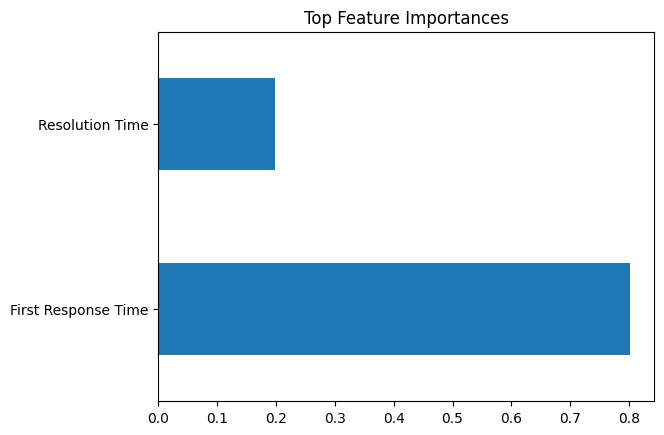

In [545]:
# Visualization of Results
# Feature Importance
feature_importances = pd.Series(rfc.feature_importances_, index=x.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top Feature Importances')
plt.show()